# Potential Business Opportunities in Los Angeles County

## Introduction

###### Los Angeles county is the moset populous county in the United States with more than ten million inhabitants as of 2019. It has 88 incorporated cities and many uncncoporated areas. Different culture,languages and cuisines also make Los Angeles County a international metropolis. Due to the population and broad area, there are a lot of business oppurtunities in this area. The city governments may think about how to improve the quality of life and convinence for the residents living in the cities. On the other hand, many companies are also thinking and looking for the business opportunities in Los Angeles area. 
##### It could be hard for companies to make any business decisions if they don't have big pictures of what the cities actually need. In this project, we will use geographic information for each city to fetch neighborhood venues via Foursquare API. Based on the most popular venues information found in each city, we can compare the category of venues among the cities in Los Angeles county. To make the result more accurate, we will also include the data of city population, average age, household size and income. We will analyze and find out where the potiential opportunities are for the cities in Los Angeles county or what kind of business can be succesful in each city.


### Data Sources:
##### The following data files are used for the analysis
##### 1. <a href="https://www.mapsofworld.com/usa/zipcodes/california/los-angeles/" target="_blank">Los Angeles County City List</a> - City and Zipcode Mapping for the cities in Los Angeles County.
##### 2. <a href="https://data.lacity.org/Community-Economic-Development/2010-Census-Populations-by-Zip-Code/nxs9-385f" target = "_blank"> Los Angeles County Population and Household File </a> - Total Population, Total Male, Total Femail, Total Household, Avg. Houshold for the cities of Los Angeles County.
##### 3. <a href="https://en.wikipedia.org/wiki/Demographics_of_Los_Angeles_County" target="_blank"> Los Angeles County Household Income </a> - Medium Household Income and Medium Family Income for the cityes of Los Angeles County
##### 4. Neighborhood Venues from Foursquare based on coordinate of cities.  

In [112]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans 

from geopy.geocoders import Nominatim
import requests

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

##### Get the source data for City and Zipcode Mapping for the cities in Los Angeles County.
##### The file contains the following fields:
###### 1. State
###### 2. Borough
###### 3. City
###### 4. Zipcode

##### State, Borough and City are combined to Address field to get the address to get city latitude and longitute. 

In [113]:
url="https://www.mapsofworld.com/usa/zipcodes/california/los-angeles/"
tbls=pd.read_html(url)
print(len(tbls))

10


In [114]:
city_zip_map=tbls[2]
city_zip_map.columns=['State','Borough','City','Zipcode']
city_zip_map.drop([0],inplace=True)
city_zip_map["Address"]=city_zip_map["City"]+","+city_zip_map["Borough"]+","+city_zip_map["State"]
city_zip_map['Zipcode']=pd.to_numeric(city_zip_map['Zipcode'])
city_zip_map.head()

State      Borough          City  Zipcode  \
1  California  Los Angeles         Acton    93510   
2  California  Los Angeles  Agoura Hills    91301   
3  California  Los Angeles      Alhambra    91801   
4  California  Los Angeles      Altadena    91001   
5  California  Los Angeles       Arcadia    91006   

                               Address  
1         Acton,Los Angeles,California  
2  Agoura Hills,Los Angeles,California  
3      Alhambra,Los Angeles,California  
4      Altadena,Los Angeles,California  
5       Arcadia,Los Angeles,California

#### The coordinate of each city can be retrieved via geocoder Nominatim model based on the address field created in the previous step.

In [115]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_los_angeles_agent")
city_zip_map["Loc_Coord"]=city_zip_map['Address'].apply(geolocator.geocode).apply(lambda Address:tuple(Address.point) if Address else None)
city_zip_map[["lat","log","altitude"]]=pd.DataFrame(city_zip_map["Loc_Coord"].tolist(),index=city_zip_map.index)
city_zip_map.drop(['Loc_Coord','altitude'],axis=1,inplace=True)
city_zip_map

State      Borough              City  Zipcode  \
1    California  Los Angeles             Acton    93510   
2    California  Los Angeles      Agoura Hills    91301   
3    California  Los Angeles          Alhambra    91801   
4    California  Los Angeles          Altadena    91001   
5    California  Los Angeles           Arcadia    91006   
6    California  Los Angeles           Artesia    90701   
7    California  Los Angeles            Avalon    90704   
8    California  Los Angeles             Azusa    91702   
9    California  Los Angeles      Baldwin Park    91706   
10   California  Los Angeles              Bell    90202   
11   California  Los Angeles      Bell Gardens    90201   
12   California  Los Angeles        Bellflower    90706   
13   California  Los Angeles     Beverly Hills    90209   
14   California  Los Angeles           Burbank    91501   
15   California  Los Angeles         Calabasas    91302   
16   California  Los Angeles       Canoga Park    91303   
17   California  Los Angeles    Canyon Country    91351   
18   California  Los Angeles            Carson    90745   
19   California  Los Angeles           Castaic    91310   
20   California  Los Angeles          Cerritos    90703   
21   California  Los Angeles        Chatsworth    91311   
22   California  Los Angeles  City Of Industry    91714   
23   California  Los Angeles         Claremont    91711   
24   California  Los Angeles           Compton    90220   
25   California  Los Angeles            Covina    91722   
26   California  Los Angeles       Culver City    90230   
27   California  Los Angeles       Diamond Bar    91765   
28   California  Los Angeles        Dodgertown    90090   
29   California  Los Angeles            Downey    90239   
30   California  Los Angeles            Duarte    91008   
..          ...          ...               ...      ...   
106  California  Los Angeles        South Gate    90280   
107  California  Los Angeles    South Pasadena    91030   
108  California  Los Angeles   Stevenson Ranch    91381   
109  California  Los Angeles       Studio City    91604   
110  California  Los Angeles        Sun Valley    91352   
111  California  Los Angeles           Sunland    91040   
112  California  Los Angeles            Sylmar    91342   
113  California  Los Angeles           Tarzana    91356   
114  California  Los Angeles       Temple City    91780   
115  California  Los Angeles     Thousand Oaks    91363   
116  California  Los Angeles       Toluca Lake    91610   
117  California  Los Angeles           Topanga    90290   
118  California  Los Angeles          Torrance    90501   
119  California  Los Angeles           Tujunga    91042   
120  California  Los Angeles    Universal City    91608   
121  California  Los Angeles          Valencia    91354   
122  California  Los Angeles    Valley Village    91607   
123  California  Los Angeles          Valyermo    93563   
124  California  Los Angeles          Van Nuys    91388   
125  California  Los Angeles            Venice    90291   
126  California  Los Angeles      Verdugo City    91046   
127  California  Los Angeles            Walnut    91788   
128  California  Los Angeles       West Covina    91790   
129  California  Los Angeles        West Hills    91307   
130  California  Los Angeles    West Hollywood    90069   
131  California  Los Angeles  Westlake Village    91359   
132  California  Los Angeles          Whittier    90601   
133  California  Los Angeles        Wilmington    90744   
134  California  Los Angeles          Winnetka    91306   
135  California  Los Angeles    Woodland Hills    91364   

                                     Address        lat         log  
1               Acton,Los Angeles,California  34.480741 -118.186838  
2        Agoura Hills,Los Angeles,California  34.147910 -118.765704  
3            Alhambra,Los Angeles,California  34.093042 -118.127060  
4            Altadena,Los Angeles,California  34.186316 -118.135233  
5

####  Get City Population, Median Age, Total Households and Average Household size data file.

In [116]:
population=pd.read_csv("2010_Census_Populations_by_Zip_Code.csv")
population['Zip Code']=pd.to_numeric(population['Zip Code'])
population.head()

Zip Code  Total Population  Median Age  Total Males  Total Females  \
0     91371                 1        73.5            0              1   
1     90001             57110        26.6        28468          28642   
2     90002             51223        25.5        24876          26347   
3     90003             66266        26.3        32631          33635   
4     90004             62180        34.8        31302          30878   

   Total Households  Average Household Size  
0                 1                    1.00  
1             12971                    4.40  
2             11731                    4.36  
3             15642                    4.22  
4             22547                    2.73

#### Merge City Mapping file and Population file together based on Zip code.

In [117]:
population_household=pd.merge(left=population,right=city_zip_map,left_on=population['Zip Code'],right_on=city_zip_map['Zipcode'])
population_household.head()

key_0  Zip Code  Total Population  Median Age  Total Males  Total Females  \
0  90001     90001             57110        26.6        28468          28642   
1  90069     90069             20483        41.5        12153           8330   
2  90090     90090                 0         0.0            0              0   
3  90094     90094              5464        33.7         2559           2905   
4  90201     90201            101279        27.8        50658          50621   

   Total Households  Average Household Size       State      Borough  \
0             12971                    4.40  California  Los Angeles   
1             13364                    1.53  California  Los Angeles   
2                 0                    0.00  California  Los Angeles   
3              2949                    1.85  California  Los Angeles   
4             24104                    4.16  California  Los Angeles   

             City  Zipcode                                Address        lat  \
0     Los Angeles    90001     Los Angeles,Los Angeles,California  34.053691   
1  West Hollywood    90069  West Hollywood,Los Angeles,California  34.092301   
2      Dodgertown    90090      Dodgertown,Los Angeles,California        NaN   
3     Playa Vista    90094     Playa Vista,Los Angeles,California  33.976010   
4    Bell Gardens    90201    Bell Gardens,Los Angeles,California  33.969456   

          log  
0 -118.242766  
1 -118.369289  
2         NaN  
3 -118.418165  
4 -118.150395

In [118]:
population_household.shape

(121, 15)

#### Data cleanse to drop nan values from dataset

In [119]:
population_household.groupby("City").sum().reset_index()
population_household.dropna(subset=['lat','log'],inplace=True)
population_household.head()

key_0  Zip Code  Total Population  Median Age  Total Males  Total Females  \
0  90001     90001             57110        26.6        28468          28642   
1  90069     90069             20483        41.5        12153           8330   
3  90094     90094              5464        33.7         2559           2905   
4  90201     90201            101279        27.8        50658          50621   
5  90220     90220             49328        29.8        23773          25555   

   Total Households  Average Household Size       State      Borough  \
0             12971                    4.40  California  Los Angeles   
1             13364                    1.53  California  Los Angeles   
3              2949                    1.85  California  Los Angeles   
4             24104                    4.16  California  Los Angeles   
5             12741                    3.85  California  Los Angeles   

             City  Zipcode                                Address        lat  \
0     Los Angeles    90001     Los Angeles,Los Angeles,California  34.053691   
1  West Hollywood    90069  West Hollywood,Los Angeles,California  34.092301   
3     Playa Vista    90094     Playa Vista,Los Angeles,California  33.976010   
4    Bell Gardens    90201    Bell Gardens,Los Angeles,California  33.969456   
5         Compton    90220         Compton,Los Angeles,California  33.894927   

          log  
0 -118.242766  
1 -118.369289  
3 -118.418165  
4 -118.150395  
5 -118.226624

In [120]:
population_household.shape

(119, 15)

#### Get City Household income data for Los Angeles County

In [121]:
url2="https://en.wikipedia.org/wiki/Demographics_of_Los_Angeles_County"
tbl2=pd.read_html(url2)
Population_Income=tbl2[2]
Population_Income.columns=['Place', 'Type','Population','Per capita income','Median household income','Median family income']
Population_Income.head()

Place  Type  Population Per capita income Median household income  \
0         Acton   CDP        7138           $33,279                 $87,896   
1  Agoura Hills  City       20353           $53,193                $108,820   
2    Agua Dulce   CDP        2991           $39,064                 $97,000   
3      Alhambra  City       83301           $24,849                 $52,717   
4  Alondra Park   CDP        8358           $23,742                 $58,906   

  Median family income  
0              $94,673  
1             $129,648  
2             $105,833  
3              $56,062  
4              $57,784

In [122]:
Population_Income.shape

(141, 6)

#### Merge the income file with the main file

In [123]:
pop_house_income=pd.merge(left=population_household,right=Population_Income,left_on="City",right_on="Place")
pop_house_income.head()

key_0  Zip Code  Total Population  Median Age  Total Males  Total Females  \
0  90001     90001             57110        26.6        28468          28642   
1  90069     90069             20483        41.5        12153           8330   
2  90201     90201            101279        27.8        50658          50621   
3  90220     90220             49328        29.8        23773          25555   
4  90230     90230             31766        39.1        14932          16834   

   Total Households  Average Household Size       State      Borough  \
0             12971                    4.40  California  Los Angeles   
1             13364                    1.53  California  Los Angeles   
2             24104                    4.16  California  Los Angeles   
3             12741                    3.85  California  Los Angeles   
4             12883                    2.45  California  Los Angeles   

             City  Zipcode                                Address        lat  \
0     Los Angeles    90001     Los Angeles,Los Angeles,California  34.053691   
1  West Hollywood    90069  West Hollywood,Los Angeles,California  34.092301   
2    Bell Gardens    90201    Bell Gardens,Los Angeles,California  33.969456   
3         Compton    90220         Compton,Los Angeles,California  33.894927   
4     Culver City    90230     Culver City,Los Angeles,California  34.021122   

          log           Place  Type  Population Per capita income  \
0 -118.242766     Los Angeles  City     3782544           $28,222   
1 -118.369289  West Hollywood  City       34564           $53,227   
2 -118.150395    Bell Gardens  City       42294           $12,026   
3 -118.226624         Compton  City       96102           $13,595   
4 -118.396466     Culver City  City       38899           $42,832   

  Median household income Median family income  
0                 $50,028              $54,243  
1                 $52,303              $63,725  
2                 $38,971              $39,190  
3                 $43,311              $44,835  
4                 $75,596              $96,809

In [124]:
pop_house_income.shape

(76, 21)

#### Data Cleanse to remove duplicated columns, irrelevant columns and reco to get the final data file for further analysis

In [125]:
pop_house_income_final=pop_house_income.drop(["key_0","Zip Code","Zipcode","Place","Type","Total Population","State","Borough"],axis=1)
pop_house_income_final.head()

Median Age  Total Males  Total Females  Total Households  \
0        26.6        28468          28642             12971   
1        41.5        12153           8330             13364   
2        27.8        50658          50621             24104   
3        29.8        23773          25555             12741   
4        39.1        14932          16834             12883   

   Average Household Size            City  \
0                    4.40     Los Angeles   
1                    1.53  West Hollywood   
2                    4.16    Bell Gardens   
3                    3.85         Compton   
4                    2.45     Culver City   

                                 Address        lat         log  Population  \
0     Los Angeles,Los Angeles,California  34.053691 -118.242766     3782544   
1  West Hollywood,Los Angeles,California  34.092301 -118.369289       34564   
2    Bell Gardens,Los Angeles,California  33.969456 -118.150395       42294   
3         Compton,Los Angeles,California  33.894927 -118.226624       96102   
4     Culver City,Los Angeles,California  34.021122 -118.396466       38899   

  Per capita income Median household income Median family income  
0           $28,222                 $50,028              $54,243  
1           $53,227                 $52,303              $63,725  
2           $12,026                 $38,971              $39,190  
3           $13,595                 $43,311              $44,835  
4           $42,832                 $75,596              $96,809

###### Reorganize the order of columns to get finalized dataset for further analysis.

In [126]:
pop_house_income_final=pop_house_income_final[['City','Address','lat','log','Population','Median Age','Total Males','Total Females','Total Households','Average Household Size','Per capita income','Median household income','Median family income']]
pop_house_income_final                          

City                                     Address  \
0           Los Angeles          Los Angeles,Los Angeles,California   
1        West Hollywood       West Hollywood,Los Angeles,California   
2          Bell Gardens         Bell Gardens,Los Angeles,California   
3               Compton              Compton,Los Angeles,California   
4           Culver City          Culver City,Los Angeles,California   
5            El Segundo           El Segundo,Los Angeles,California   
6               Gardena              Gardena,Los Angeles,California   
7             Hawthorne            Hawthorne,Los Angeles,California   
8         Hermosa Beach        Hermosa Beach,Los Angeles,California   
9       Huntington Park      Huntington Park,Los Angeles,California   
10             Lawndale             Lawndale,Los Angeles,California   
11              Lynwood              Lynwood,Los Angeles,California   
12               Malibu               Malibu,Los Angeles,California   
13      Manhattan Beach      Manhattan Beach,Los Angeles,California   
14              Maywood              Maywood,Los Angeles,California   
15  Rancho Palos Verdes  Rancho Palos Verdes,Los Angeles,California   
16        Redondo Beach        Redondo Beach,Los Angeles,California   
17           South Gate           South Gate,Los Angeles,California   
18              Topanga              Topanga,Los Angeles,California   
19            Inglewood            Inglewood,Los Angeles,California   
20         Santa Monica         Santa Monica,Los Angeles,California   
21             Torrance             Torrance,Los Angeles,California   
22             Whittier             Whittier,Los Angeles,California   
23           Montebello           Montebello,Los Angeles,California   
24              Norwalk              Norwalk,Los Angeles,California   
25          Pico Rivera          Pico Rivera,Los Angeles,California   
26     Santa Fe Springs     Santa Fe Springs,Los Angeles,California   
27              Artesia              Artesia,Los Angeles,California   
28             Cerritos             Cerritos,Los Angeles,California   
29               Avalon               Avalon,Los Angeles,California   
..                  ...                                         ...   
46            Calabasas            Calabasas,Los Angeles,California   
47         San Fernando         San Fernando,Los Angeles,California   
48        Santa Clarita        Santa Clarita,Los Angeles,California   
49      Stevenson Ranch      Stevenson Ranch,Los Angeles,California   
50              Burbank              Burbank,Los Angeles,California   
51                Azusa                Azusa,Los Angeles,California   
52         Baldwin Park         Baldwin Park,Los Angeles,California   
53            Claremont            Claremont,Los Angeles,California   
54               Covina               Covina,Los Angeles,California   
55             El Monte             El Monte,Los Angeles,California   
56       South El Monte       South El Monte,Los Angeles,California   
57             Glendora             Glendora,Los Angeles,California   
58            La Puente            La Puente,Los Angeles,California   
59     Hacienda Heights     Hacienda Heights,Los Angeles,California   
60      Rowland Heights      Rowland Heights,Los Angeles,California   
61             La Verne             La Verne,Los Angeles,California   
62        Monterey Park        Monterey Park,Los Angeles,California   
63          Diamond Bar          Diamond Bar,Los Angeles,California   
64               Pomona               Pomona,Los Angeles,California   
65             Rosemead             Rosemead,Los Angeles,California   
66            San Dimas            San Dimas,Los Angeles,California   
67          San Gabriel          San Gabriel,Los Angeles,California   
68          Temple City          Temple City,Los Angeles,California   
69          West Covina          West Covina,Los Angeles,California   
70             Alhambra             Alhambr

In [127]:
pop_house_income_final.shape

(76, 13)

###  Call Foursquare API to get nearest Venues

In [128]:
CLIENT_ID = 'Y5YLNIDNPUI23JM2Q5BYXBKVWNHGV3JIL51XMEENCTF0RQDB' # your Foursquare ID
CLIENT_SECRET = '4AU0BET30XXBJ2HOLOJE0XUBD4PTBYAKIY1FHPQXXJW1LCYP' # your Foursquare Secret
#ACCESS_TOKEN = 'YYU1ENYS03KWZXR5CJNZPPM0LS005NUJJAGVKPYYUDJHWRMR' # your FourSquare Access Token
VERSION = '20210206'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: Y5YLNIDNPUI23JM2Q5BYXBKVWNHGV3JIL51XMEENCTF0RQDB
CLIENT_SECRET:4AU0BET30XXBJ2HOLOJE0XUBD4PTBYAKIY1FHPQXXJW1LCYP


In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [130]:
LA_venues=getNearbyVenues(pop_house_income_final['City'], latitudes=pop_house_income_final['lat'], longitudes=pop_house_income_final['log'], radius=10000)

Los Angeles
West Hollywood
Bell Gardens
Compton
Culver City
El Segundo
Gardena
Hawthorne
Hermosa Beach
Huntington Park
Lawndale
Lynwood
Malibu
Manhattan Beach
Maywood
Rancho Palos Verdes
Redondo Beach
South Gate
Topanga
Inglewood
Santa Monica
Torrance
Whittier
Montebello
Norwalk
Pico Rivera
Santa Fe Springs
Artesia
Cerritos
Avalon
Bellflower
Hawaiian Gardens
Lomita
Paramount
Carson
Signal Hill
Altadena
Arcadia
Duarte
Monrovia
Sierra Madre
South Pasadena
Pasadena
San Marino
Glendale
Agoura Hills
Calabasas
San Fernando
Santa Clarita
Stevenson Ranch
Burbank
Azusa
Baldwin Park
Claremont
Covina
El Monte
South El Monte
Glendora
La Puente
Hacienda Heights
Rowland Heights
La Verne
Monterey Park
Diamond Bar
Pomona
Rosemead
San Dimas
San Gabriel
Temple City
West Covina
Alhambra
Acton
Lake Hughes
Lancaster
Littlerock
Palmdale


In [131]:
LA_venues.shape

(2258, 7)

In [132]:
LA_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Los Angeles              34.053691             -118.242766   
1  Los Angeles              34.053691             -118.242766   
2  Los Angeles              34.053691             -118.242766   
3  Los Angeles              34.053691             -118.242766   
4  Los Angeles              34.053691             -118.242766   

                       Venue  Venue Latitude  Venue Longitude  \
0                 Grand Park       34.055034      -118.245179   
1   Walt Disney Concert Hall       34.055511      -118.249284   
2  Dorothy Chandler Pavilion       34.056625      -118.248886   
3                  The Broad       34.054474      -118.250051   
4   Los Angeles Music Center       34.057133      -118.248354   

          Venue Category  
0                   Park  
1           Concert Hall  
2  Performing Arts Venue  
3             Art Museum  
4            Music Venue

In [133]:
#LA_one_hot=pd.get_dummies(LA_venues, columns=['Venue Category'], prefix="", prefix_sep="")
LA_one_hot=pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")
LA_one_hot['Neighborhood']=LA_venues['Neighborhood']
M=LA_one_hot['Neighborhood']
LA_one_hot.drop(['Neighborhood'],axis=1,inplace=True)
LA_one_hot.insert(0,'Neighborhood',M)
#fixed_columns = [LA_one_hot.columns[-1]] + list(LA_one_hot.columns[:-1])
#LA_one_hot = LA_one_hot[fixed_columns]
LA_one_hot.head()

Neighborhood  ATM  American Restaurant  Animal Shelter  Antique Shop  \
0  Los Angeles    0                    0               0             0   
1  Los Angeles    0                    0               0             0   
2  Los Angeles    0                    0               0             0   
3  Los Angeles    0                    0               0             0   
4  Los Angeles    0                    0               0             0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           1                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0                 0                   0                0          0   
1                 0                   0                0          0   
2                 0                   0                0          0   
3                 0                   0                0          0   
4                 0                   0                0          0   

   Bagel Shop  Bakery  Bar  Baseball Field  Beach  Bed & Breakfast  \
0           0       0    0               0      0                0   
1           0       0    0               0      0                0   
2           0       0    0               0      0                0   
3           0       0    0               0      0                0   
4           0       0    0               0      0                0   

   Beer Garden  Big Box Store  Bistro  Boat or Ferry  Bookstore  Boutique  \
0            0              0       0              0          0         0   
1            0              0       0              0          0         0   
2            0              0       0              0          0         0   
3            0              0       0              0          0         0   
4            0              0       0              0          0         0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0                     0               0        0   
1              0                     0               0        0   
2              0                     0               0        0   
3              0                     0               0        0   
4              0                     0               0        0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Business Service  \
0                0         0             0              0                 0   
1                0         0             0              0                 0   
2                0         0             0              0                 0   
3                0         0             0              0                 0   
4                0         0             0              0                 0   

   Café  Cajun / Creole Restaurant  Campground  Candy Store  Cheese Shop  \
0     0                          0           0            0            0   
1     0                          0           0            0            0   
2     0                          0           0            0            0   
3     0                          0           0            0            0   
4     0                          0           0            0            0   

   Chinese Restaurant  Church  Climbing Gym  Clothing Store  Cocktail Bar  \
0                   0       0             0               0             0   
1                   0       0             0               0             0   
2                   0       0             0               0             0   
3                   0       0             0               0             0   
4                   0       0             0               0             0  

In [134]:
LA_one_hot.shape

(2258, 226)

In [173]:
LA_group=LA_one_hot.groupby('Neighborhood').mean().reset_index()
LA_group.head()

Neighborhood  ATM  American Restaurant  Animal Shelter  Antique Shop  \
0         Acton  0.0             0.038462             0.0           0.0   
1  Agoura Hills  0.0             0.066667             0.0           0.0   
2      Alhambra  0.0             0.000000             0.0           0.0   
3      Altadena  0.0             0.033333             0.0           0.0   
4       Arcadia  0.0             0.000000             0.0           0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0     0.000000    0.000000                  0.0   
1                     0.0     0.000000    0.000000                  0.0   
2                     0.0     0.000000    0.000000                  0.0   
3                     0.0     0.033333    0.000000                  0.0   
4                     0.0     0.066667    0.033333                  0.0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0               0.0            0.038462              0.0   0.000000   
1               0.0            0.000000              0.0   0.033333   
2               0.0            0.000000              0.0   0.000000   
3               0.0            0.000000              0.0   0.000000   
4               0.0            0.000000              0.0   0.000000   

   Bagel Shop    Bakery       Bar  Baseball Field  Beach  Bed & Breakfast  \
0         0.0  0.000000  0.000000             0.0    0.0              0.0   
1         0.0  0.033333  0.000000             0.0    0.0              0.0   
2         0.0  0.033333  0.000000             0.0    0.0              0.0   
3         0.0  0.033333  0.000000             0.0    0.0              0.0   
4         0.0  0.033333  0.033333             0.0    0.0              0.0   

   Beer Garden  Big Box Store  Bistro  Boat or Ferry  Bookstore  Boutique  \
0          0.0       0.000000     0.0            0.0   0.000000       0.0   
1          0.0       0.033333     0.0            0.0   0.000000       0.0   
2          0.0       0.000000     0.0            0.0   0.000000       0.0   
3          0.0       0.000000     0.0            0.0   0.033333       0.0   
4          0.0       0.000000     0.0            0.0   0.100000       0.0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot   Brewery  \
0            0.0                   0.0        0.038462  0.000000   
1            0.0                   0.0        0.000000  0.033333   
2            0.0                   0.0        0.000000  0.000000   
3            0.0                   0.0        0.000000  0.000000   
4            0.0                   0.0        0.000000  0.033333   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Business Service  \
0              0.0  0.000000      0.000000            0.0          0.038462   
1              0.0  0.000000      0.033333            0.0          0.000000   
2              0.0  0.000000      0.033333            0.0          0.000000   
3              0.0  0.000000      0.033333            0.0          0.000000   
4              0.0  0.033333      0.000000            0.0          0.000000   

       Café  Cajun / Creole Restaurant  Campground  Candy Store  Cheese Shop  \
0  0.038462                   0.000000    0.038462     0.000000     0.000000   
1  0.000000                   0.000000    0.000000     0.000000     0.000000   
2  0.033333                   0.000000    0.000000     0.000000     0.000000   
3  0.100000                   0.000000    0.000000     0.000000     0.000000   
4  0.000000                   0.033333    0.000000     0.033333     0.033333   

   Chinese Restaurant    Church  Climbing Gym  Clothing Store  Cocktail Bar  \
0            0.000000  0.000000           0.0             0.0           0.0   
1            0.000000  0.000000           0.0             0.0           0.0   
2            0.033333  0.033333           0.0             0.0           0.0   
3            0.000000  0.000000           0.0             0.0      

In [174]:
num_top_venues = 10

for hood in LA_group['Neighborhood']:
    print("----"+hood+"----")
    temp = LA_group[LA_group['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[5:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton----
              venue  freq
0              Park  0.12
1             Trail  0.08
2     Grocery Store  0.08
3      Home Service  0.08
4    Sandwich Place  0.04
5   Supplement Shop  0.04
6  Business Service  0.04
7              Café  0.04
8       Event Space  0.04
9       Gas Station  0.04


----Agoura Hills----
                  venue  freq
0         Grocery Store  0.10
1  Fast Food Restaurant  0.07
2              Wine Bar  0.07
3         Deli / Bodega  0.07
4                 Trail  0.03
5        Sandwich Place  0.03
6    Seafood Restaurant  0.03
7          Dessert Shop  0.03
8            Food Court  0.03
9                   Spa  0.03


----Alhambra----
                   venue  freq
0                   Park  0.07
1                 Garden  0.07
2          Grocery Store  0.07
3         Sandwich Place  0.07
4  Vietnamese Restaurant  0.07
5            Pizza Place  0.07
6         Ice Cream Shop  0.03
7                   Food  0.03
8                 Church  0.03
9     Chinese Rest

                      venue  freq
0       Japanese Restaurant  0.10
1        Italian Restaurant  0.07
2              Noodle House  0.07
3      Fast Food Restaurant  0.07
4          Sushi Restaurant  0.07
5              Burger Joint  0.07
6  Mediterranean Restaurant  0.07
7            Ice Cream Shop  0.03
8          Department Store  0.03
9               Coffee Shop  0.03


----Glendale----
                       venue  freq
0                  Bookstore  0.10
1                Coffee Shop  0.07
2           Sushi Restaurant  0.07
3                Art Gallery  0.07
4             Ice Cream Shop  0.03
5                    Theater  0.03
6                   Building  0.03
7                Music Venue  0.03
8  Cajun / Creole Restaurant  0.03
9                Candy Store  0.03


----Glendora----
                    venue  freq
0    Fast Food Restaurant  0.17
1      Mexican Restaurant  0.07
2           Grocery Store  0.07
3             Pizza Place  0.07
4          Breakfast Spot  0.07
5  Argentin

                       venue  freq
0         Mexican Restaurant  0.13
1               Burger Joint  0.13
2       Fast Food Restaurant  0.10
3         Chinese Restaurant  0.07
4        Japanese Restaurant  0.03
5         Italian Restaurant  0.03
6              Movie Theater  0.03
7                        Gym  0.03
8              Deli / Bodega  0.03
9  Middle Eastern Restaurant  0.03


----Monterey Park----
                  venue  freq
0    Mexican Restaurant  0.13
1        Sandwich Place  0.07
2    Chinese Restaurant  0.07
3     Convenience Store  0.07
4          Burger Joint  0.07
5                 Hotel  0.03
6                   Gym  0.03
7         Grocery Store  0.03
8           Pizza Place  0.03
9  Taiwanese Restaurant  0.03


----Norwalk----
                  venue  freq
0  Fast Food Restaurant  0.17
1           Pizza Place  0.07
2           Coffee Shop  0.07
3                  Park  0.07
4         Grocery Store  0.07
5    Mexican Restaurant  0.07
6          Skating Rink  0.03
7  

                venue  freq
0         Pizza Place  0.13
1       Grocery Store  0.10
2        Burger Joint  0.07
3                Park  0.07
4              Garden  0.07
5      Ice Cream Shop  0.03
6      Sandwich Place  0.03
7              Museum  0.03
8  Italian Restaurant  0.03
9               Hotel  0.03


----Stevenson Ranch----
                          venue  freq
0                   Coffee Shop  0.10
1  Theme Park Ride / Attraction  0.10
2                          Park  0.07
3                   Pizza Place  0.03
4            Frozen Yogurt Shop  0.03
5        Furniture / Home Store  0.03
6                  Dance Studio  0.03
7                     Pet Store  0.03
8                         Trail  0.03
9                Clothing Store  0.03


----Temple City----
                  venue  freq
0         Grocery Store  0.07
1          Dessert Shop  0.07
2    Chinese Restaurant  0.07
3   Dumpling Restaurant  0.07
4                Bakery  0.07
5  Fast Food Restaurant  0.03
6            Smo

##### Write a function to sort the venues in descending order

In [175]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[5:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [176]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = LA_group['Neighborhood']

for ind in np.arange(LA_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Acton                  Park          Home Service   
1  Agoura Hills         Grocery Store         Deli / Bodega   
2      Alhambra        Sandwich Place         Grocery Store   
3      Altadena                  Café        Scenic Lookout   
4       Arcadia             Bookstore           Art Gallery   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0         Grocery Store                  Trail        Sandwich Place   
1  Fast Food Restaurant               Wine Bar          Burger Joint   
2                Garden  Vietnamese Restaurant           Pizza Place   
3                 Trail              Wine Shop             Multiplex   
4           Coffee Shop       Sushi Restaurant        Ice Cream Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Campground                  Café      Business Service   
1                   Spa    Seafood Restaurant        Sandwich Place   
2                  Park        Ice Cream Shop  Fast Food Restaurant   
3                   Gym        Ice Cream Shop      Sushi Restaurant   
4           Music Venue              Building     German Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0    Mexican Restaurant        Supplement Shop  
1          Dessert Shop                   Park  
2                  Café     Chinese Restaurant  
3           Coffee Shop          Grocery Store  
4        Sandwich Place                 Market

In [177]:
LA_Cluster=LA_group.drop(['Neighborhood'],axis=1)
LA_Cluster.head()

ATM  American Restaurant  Animal Shelter  Antique Shop  \
0  0.0             0.038462             0.0           0.0   
1  0.0             0.066667             0.0           0.0   
2  0.0             0.000000             0.0           0.0   
3  0.0             0.033333             0.0           0.0   
4  0.0             0.000000             0.0           0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0     0.000000    0.000000                  0.0   
1                     0.0     0.000000    0.000000                  0.0   
2                     0.0     0.000000    0.000000                  0.0   
3                     0.0     0.033333    0.000000                  0.0   
4                     0.0     0.066667    0.033333                  0.0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0               0.0            0.038462              0.0   0.000000   
1               0.0            0.000000              0.0   0.033333   
2               0.0            0.000000              0.0   0.000000   
3               0.0            0.000000              0.0   0.000000   
4               0.0            0.000000              0.0   0.000000   

   Bagel Shop    Bakery       Bar  Baseball Field  Beach  Bed & Breakfast  \
0         0.0  0.000000  0.000000             0.0    0.0              0.0   
1         0.0  0.033333  0.000000             0.0    0.0              0.0   
2         0.0  0.033333  0.000000             0.0    0.0              0.0   
3         0.0  0.033333  0.000000             0.0    0.0              0.0   
4         0.0  0.033333  0.033333             0.0    0.0              0.0   

   Beer Garden  Big Box Store  Bistro  Boat or Ferry  Bookstore  Boutique  \
0          0.0       0.000000     0.0            0.0   0.000000       0.0   
1          0.0       0.033333     0.0            0.0   0.000000       0.0   
2          0.0       0.000000     0.0            0.0   0.000000       0.0   
3          0.0       0.000000     0.0            0.0   0.033333       0.0   
4          0.0       0.000000     0.0            0.0   0.100000       0.0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot   Brewery  \
0            0.0                   0.0        0.038462  0.000000   
1            0.0                   0.0        0.000000  0.033333   
2            0.0                   0.0        0.000000  0.000000   
3            0.0                   0.0        0.000000  0.000000   
4            0.0                   0.0        0.000000  0.033333   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Business Service  \
0              0.0  0.000000      0.000000            0.0          0.038462   
1              0.0  0.000000      0.033333            0.0          0.000000   
2              0.0  0.000000      0.033333            0.0          0.000000   
3              0.0  0.000000      0.033333            0.0          0.000000   
4              0.0  0.033333      0.000000            0.0          0.000000   

       Café  Cajun / Creole Restaurant  Campground  Candy Store  Cheese Shop  \
0  0.038462                   0.000000    0.038462     0.000000     0.000000   
1  0.000000                   0.000000    0.000000     0.000000     0.000000   
2  0.033333                   0.000000    0.000000     0.000000     0.000000   
3  0.100000                   0.000000    0.000000     0.000000     0.000000   
4  0.000000                   0.033333    0.000000     0.033333     0.033333   

   Chinese Restaurant    Church  Climbing Gym  Clothing Store  Cocktail Bar  \
0            0.000000  0.000000           0.0             0.0           0.0   
1            0.000000  0.000000           0.0             0.0           0.0   
2            0.033333  0.033333           0.0             0.0           0.0   
3            0.000000  0.000000           0.0             0.0           0.0   
4            0.000000  0.000000           0.0             0.0           

### Cluster

In [178]:
k=5
kmean=KMeans(init="k-means++",n_clusters=k,n_init=12)
kmean.fit(LA_Cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [179]:
kmean.labels_

array([1, 1, 1, 0, 4, 1, 3, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 4,
       1, 2, 4, 2, 1, 1, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 4, 2, 3, 1, 2,
       1, 2, 2, 2, 2, 2, 4, 2, 2, 0, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 0, 1, 2, 4, 2])

In [180]:
neighborhoods_venues_sorted.insert(0,"Cluster ID",kmean.labels_)

In [181]:
neighborhoods_venues_sorted.head()

Cluster ID  Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           1         Acton                  Park          Home Service   
1           1  Agoura Hills         Grocery Store         Deli / Bodega   
2           1      Alhambra        Sandwich Place         Grocery Store   
3           0      Altadena                  Café        Scenic Lookout   
4           4       Arcadia             Bookstore           Art Gallery   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0         Grocery Store                  Trail        Sandwich Place   
1  Fast Food Restaurant               Wine Bar          Burger Joint   
2                Garden  Vietnamese Restaurant           Pizza Place   
3                 Trail              Wine Shop             Multiplex   
4           Coffee Shop       Sushi Restaurant        Ice Cream Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Campground                  Café      Business Service   
1                   Spa    Seafood Restaurant        Sandwich Place   
2                  Park        Ice Cream Shop  Fast Food Restaurant   
3                   Gym        Ice Cream Shop      Sushi Restaurant   
4           Music Venue              Building     German Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0    Mexican Restaurant        Supplement Shop  
1          Dessert Shop                   Park  
2                  Café     Chinese Restaurant  
3           Coffee Shop          Grocery Store  
4        Sandwich Place                 Market

In [182]:
neighborhoods_venues_sorted_final=pd.merge(left=pop_house_income_final,right=neighborhoods_venues_sorted,left_on='City',right_on='Neighborhood')
neighborhoods_venues_sorted_final.drop(['Address','lat','log','Total Males','Total Females','Total Households','Neighborhood'],axis=1,inplace=True)
neighborhoods_venues_sorted_final

City  Population  Median Age  Average Household Size  \
0           Los Angeles     3782544        26.6                    4.40   
1        West Hollywood       34564        41.5                    1.53   
2          Bell Gardens       42294        27.8                    4.16   
3               Compton       96102        29.8                    3.85   
4           Culver City       38899        39.1                    2.45   
5            El Segundo       16597        39.2                    2.34   
6               Gardena       58743        35.5                    2.96   
7             Hawthorne       84293        31.9                    2.98   
8         Hermosa Beach       19422        37.0                    2.04   
9       Huntington Park       58465        29.1                    4.06   
10             Lawndale       32652        32.7                    3.33   
11              Lynwood       69818        27.8                    4.57   
12               Malibu       12746        19.7                    0.00   
13      Manhattan Beach       34986        40.9                    2.50   
14              Maywood       27454        27.9                    4.16   
15  Rancho Palos Verdes       41575        47.8                    2.65   
16        Redondo Beach       66397        42.0                    2.07   
17           South Gate       94586        29.4                    4.05   
18              Topanga        9065        45.0                    2.44   
19            Inglewood      109967        32.6                    3.01   
20         Santa Monica       89153        37.8                    1.49   
21             Torrance      144622        35.0                    2.94   
22             Whittier       85161        36.6                    2.89   
23           Montebello       62470        34.7                    3.27   
24              Norwalk      105348        32.5                    3.83   
25          Pico Rivera       63004        34.0                    3.77   
26     Santa Fe Springs       16333        36.2                    3.34   
27              Artesia       16495        38.2                    3.51   
28             Cerritos       49281        43.9                    3.16   
29               Avalon        3690        37.2                    2.50   
..                  ...         ...         ...                     ...   
46            Calabasas       22839        42.4                    2.76   
47         San Fernando       23638        30.1                    4.17   
48        Santa Clarita      173993        36.4                    3.01   
49      Stevenson Ranch       17116        36.0                    3.04   
50              Burbank      103037        38.3                    2.53   
51                Azusa       46177        29.4                    3.67   
52         Baldwin Park       75441        30.5                    4.35   
53            Claremont       34824        38.6                    2.58   
54               Covina       47662        34.0                    3.41   
55             El Monte      113763        32.9                    3.66   
56       South El Monte       20197        30.5                    4.40   
57             Glendora       50000        38.5                    2.94   
58            La Puente       39957        30.9                    4.55   
59     Hacienda Heights       55684        40.1                    3.33   
60      Rowland Heights       50663        39.8                    3.40   
61             La Verne       31139        42.6                    2.71   
62        Monterey Park       60251        42.9                    2.92   
63          Diamond Bar       55668        40.8                    3.08   
64               Pomona      148946        28.7                    4.01   
65             Rosemead       53725        38.3                    3.70   
66            San Dimas       33523        42.5                    2.73   
67          San Gabriel       39703        4

In [183]:
LA_group.insert(0,"Cluster ID",kmean.labels_)
LA_group.head()

Cluster ID  Neighborhood  ATM  American Restaurant  Animal Shelter  \
0           1         Acton  0.0             0.038462             0.0   
1           1  Agoura Hills  0.0             0.066667             0.0   
2           1      Alhambra  0.0             0.000000             0.0   
3           0      Altadena  0.0             0.033333             0.0   
4           4       Arcadia  0.0             0.000000             0.0   

   Antique Shop  Argentinian Restaurant  Art Gallery  Art Museum  \
0           0.0                     0.0     0.000000    0.000000   
1           0.0                     0.0     0.000000    0.000000   
2           0.0                     0.0     0.000000    0.000000   
3           0.0                     0.0     0.033333    0.000000   
4           0.0                     0.0     0.066667    0.033333   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Automotive Shop  \
0                  0.0               0.0            0.038462              0.0   
1                  0.0               0.0            0.000000              0.0   
2                  0.0               0.0            0.000000              0.0   
3                  0.0               0.0            0.000000              0.0   
4                  0.0               0.0            0.000000              0.0   

   BBQ Joint  Bagel Shop    Bakery       Bar  Baseball Field  Beach  \
0   0.000000         0.0  0.000000  0.000000             0.0    0.0   
1   0.033333         0.0  0.033333  0.000000             0.0    0.0   
2   0.000000         0.0  0.033333  0.000000             0.0    0.0   
3   0.000000         0.0  0.033333  0.000000             0.0    0.0   
4   0.000000         0.0  0.033333  0.033333             0.0    0.0   

   Bed & Breakfast  Beer Garden  Big Box Store  Bistro  Boat or Ferry  \
0              0.0          0.0       0.000000     0.0            0.0   
1              0.0          0.0       0.033333     0.0            0.0   
2              0.0          0.0       0.000000     0.0            0.0   
3              0.0          0.0       0.000000     0.0            0.0   
4              0.0          0.0       0.000000     0.0            0.0   

   Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  \
0   0.000000       0.0            0.0                   0.0        0.038462   
1   0.000000       0.0            0.0                   0.0        0.000000   
2   0.000000       0.0            0.0                   0.0        0.000000   
3   0.033333       0.0            0.0                   0.0        0.000000   
4   0.100000       0.0            0.0                   0.0        0.000000   

    Brewery  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0  0.000000              0.0  0.000000      0.000000            0.0   
1  0.033333              0.0  0.000000      0.033333            0.0   
2  0.000000              0.0  0.000000      0.033333            0.0   
3  0.000000              0.0  0.000000      0.033333            0.0   
4  0.033333              0.0  0.033333      0.000000            0.0   

   Business Service      Café  Cajun / Creole Restaurant  Campground  \
0          0.038462  0.038462                   0.000000    0.038462   
1          0.000000  0.000000                   0.000000    0.000000   
2          0.000000  0.033333                   0.000000    0.000000   
3          0.000000  0.100000                   0.000000    0.000000   
4          0.000000  0.000000                   0.033333    0.000000   

   Candy Store  Cheese Shop  Chinese Restaurant    Church  Climbing Gym  \
0     0.000000     0.000000            0.000000  0.000000           0.0   
1     0.000000     0.000000            0.000000  0.000000           0.0   
2     0.000000     0.000000            0.033333  0.033333           0.0   
3     0.000000     0.000000            0.000000  0.000000           0.0   
4     0.033333     0.033333            0.000000  0.000000           0.0   

   Clothing Stor

In [184]:
LA_final=pd.merge(left=pop_house_income_final,right=LA_group,left_on='City',right_on='Neighborhood')
LA_final['Median family income']=LA_final['Median family income'].str.replace('$','')
LA_final['Median family income']=LA_final['Median family income'].str.replace(',','')
LA_final[['Median family income']]=LA_final[['Median family income']].apply(pd.to_numeric)
LA_final

City                                     Address  \
0           Los Angeles          Los Angeles,Los Angeles,California   
1        West Hollywood       West Hollywood,Los Angeles,California   
2          Bell Gardens         Bell Gardens,Los Angeles,California   
3               Compton              Compton,Los Angeles,California   
4           Culver City          Culver City,Los Angeles,California   
5            El Segundo           El Segundo,Los Angeles,California   
6               Gardena              Gardena,Los Angeles,California   
7             Hawthorne            Hawthorne,Los Angeles,California   
8         Hermosa Beach        Hermosa Beach,Los Angeles,California   
9       Huntington Park      Huntington Park,Los Angeles,California   
10             Lawndale             Lawndale,Los Angeles,California   
11              Lynwood              Lynwood,Los Angeles,California   
12               Malibu               Malibu,Los Angeles,California   
13      Manhattan Beach      Manhattan Beach,Los Angeles,California   
14              Maywood              Maywood,Los Angeles,California   
15  Rancho Palos Verdes  Rancho Palos Verdes,Los Angeles,California   
16        Redondo Beach        Redondo Beach,Los Angeles,California   
17           South Gate           South Gate,Los Angeles,California   
18              Topanga              Topanga,Los Angeles,California   
19            Inglewood            Inglewood,Los Angeles,California   
20         Santa Monica         Santa Monica,Los Angeles,California   
21             Torrance             Torrance,Los Angeles,California   
22             Whittier             Whittier,Los Angeles,California   
23           Montebello           Montebello,Los Angeles,California   
24              Norwalk              Norwalk,Los Angeles,California   
25          Pico Rivera          Pico Rivera,Los Angeles,California   
26     Santa Fe Springs     Santa Fe Springs,Los Angeles,California   
27              Artesia              Artesia,Los Angeles,California   
28             Cerritos             Cerritos,Los Angeles,California   
29               Avalon               Avalon,Los Angeles,California   
..                  ...                                         ...   
46            Calabasas            Calabasas,Los Angeles,California   
47         San Fernando         San Fernando,Los Angeles,California   
48        Santa Clarita        Santa Clarita,Los Angeles,California   
49      Stevenson Ranch      Stevenson Ranch,Los Angeles,California   
50              Burbank              Burbank,Los Angeles,California   
51                Azusa                Azusa,Los Angeles,California   
52         Baldwin Park         Baldwin Park,Los Angeles,California   
53            Claremont            Claremont,Los Angeles,California   
54               Covina               Covina,Los Angeles,California   
55             El Monte             El Monte,Los Angeles,California   
56       South El Monte       South El Monte,Los Angeles,California   
57             Glendora             Glendora,Los Angeles,California   
58            La Puente            La Puente,Los Angeles,California   
59     Hacienda Heights     Hacienda Heights,Los Angeles,California   
60      Rowland Heights      Rowland Heights,Los Angeles,California   
61             La Verne             La Verne,Los Angeles,California   
62        Monterey Park        Monterey Park,Los Angeles,California   
63          Diamond Bar          Diamond Bar,Los Angeles,California   
64               Pomona               Pomona,Los Angeles,California   
65             Rosemead             Rosemead,Los Angeles,California   
66            San Dimas            San Dimas,Los Angeles,California   
67          San Gabriel          San Gabriel,Los Angeles,California   
68          Temple City          Temple City,Los Angeles,California   
69          West Covina          West Covina,Los Angeles,California   
70             Alhambra             Alhambr

In [185]:
pd.set_option('display.max_columns', None)
LA_final.head()

City                                Address        lat  \
0     Los Angeles     Los Angeles,Los Angeles,California  34.053691   
1  West Hollywood  West Hollywood,Los Angeles,California  34.092301   
2    Bell Gardens    Bell Gardens,Los Angeles,California  33.969456   
3         Compton         Compton,Los Angeles,California  33.894927   
4     Culver City     Culver City,Los Angeles,California  34.021122   

          log  Population  Median Age  Total Males  Total Females  \
0 -118.242766     3782544        26.6        28468          28642   
1 -118.369289       34564        41.5        12153           8330   
2 -118.150395       42294        27.8        50658          50621   
3 -118.226624       96102        29.8        23773          25555   
4 -118.396466       38899        39.1        14932          16834   

   Total Households  Average Household Size Per capita income  \
0             12971                    4.40           $28,222   
1             13364                    1.53           $53,227   
2             24104                    4.16           $12,026   
3             12741                    3.85           $13,595   
4             12883                    2.45           $42,832   

  Median household income  Median family income  Cluster ID    Neighborhood  \
0                 $50,028                 54243           4     Los Angeles   
1                 $52,303                 63725           4  West Hollywood   
2                 $38,971                 39190           2    Bell Gardens   
3                 $43,311                 44835           2         Compton   
4                 $75,596                 96809           1     Culver City   

   ATM  American Restaurant  Animal Shelter  Antique Shop  \
0  0.0             0.000000             0.0           0.0   
1  0.0             0.033333             0.0           0.0   
2  0.0             0.066667             0.0           0.0   
3  0.0             0.033333             0.0           0.0   
4  0.0             0.000000             0.0           0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0     0.066667    0.033333                  0.0   
1                     0.0     0.000000    0.000000                  0.0   
2                     0.0     0.000000    0.000000                  0.0   
3                     0.0     0.000000    0.000000                  0.0   
4                     0.0     0.000000    0.000000                  0.0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0          0.000000                 0.0              0.0        0.0   
1          0.000000                 0.0              0.0        0.0   
2          0.033333                 0.0              0.0        0.0   
3          0.000000                 0.0              0.0        0.0   
4          0.000000                 0.0              0.0        0.0   

   Bagel Shop    Bakery       Bar  Baseball Field  Beach  Bed & Breakfast  \
0         0.0  0.033333  0.033333             0.0    0.0              0.0   
1         0.0  0.000000  0.000000             0.0    0.0              0.0   
2         0.0  0.033333  0.000000             0.0    0.0              0.0   
3         0.0  0.000000  0.000000             0.0    0.0              0.0   
4         0.0  0.066667  0.000000             0.0    0.0              0.0   

   Beer Garden  Big Box Store  Bistro  Boat or Ferry  Bookstore  Boutique  \
0          0.0            0.0     0.0            0.0   0.100000  0.000000   
1          0.0            0.0     0.0            0.0   0.033333  0.033333   
2          0.0            0.0     0.0            0.0   0.000000  0.000000   
3          0.0            0.0     0.0            0.0   0.000000  0.000000   
4          0.0            0.0     0.0            0.0   0.000000  0.000000   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot   Brewery  \
0            0.0              0.000000             0.0  0.033333  

In [186]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [187]:
plt_preparation=LA_final.drop(['City','Address','lat','log','Population','Total Males','Total Females','Median Age','Total Households','Average Household Size','Per capita income','Median household income','Median family income','Neighborhood'],axis=1)
#plt_preparation=LA_final.drop(['City','Address','lat','log'],axis=1)
plt_preparation_1=plt_preparation.groupby('Cluster ID').sum()
plt_preparation_1.head()

ATM  American Restaurant  Animal Shelter  Antique Shop  \
Cluster ID                                                                
0           0.000000             0.033333        0.000000      0.000000   
1           0.000000             0.538462        0.033333      0.000000   
2           0.000000             1.000000        0.000000      0.066667   
3           0.033333             0.316667        0.000000      0.000000   
4           0.000000             0.066667        0.033333      0.000000   

            Argentinian Restaurant  Art Gallery  Art Museum  \
Cluster ID                                                    
0                         0.000000     0.033333    0.100000   
1                         0.033333     0.000000    0.033333   
2                         0.066667     0.000000    0.000000   
3                         0.000000     0.000000    0.000000   
4                         0.000000     0.300000    0.133333   

            Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
Cluster ID                                                              
0                      0.000000          0.000000            0.000000   
1                      0.033333          0.233333            0.038462   
2                      0.000000          0.300000            0.066667   
3                      0.000000          0.066667            0.000000   
4                      0.033333          0.000000            0.000000   

            Automotive Shop  BBQ Joint  Bagel Shop    Bakery       Bar  \
Cluster ID                                                               
0                  0.000000   0.000000    0.000000  0.066667  0.000000   
1                  0.000000   0.233333    0.066667  1.233333  0.133333   
2                  0.133333   0.400000    0.000000  0.833333  0.066667   
3                  0.000000   0.000000    0.000000  0.066667  0.116667   
4                  0.000000   0.000000    0.000000  0.166667  0.166667   

            Baseball Field     Beach  Bed & Breakfast  Beer Garden  \
Cluster ID                                                           
0                 0.000000  0.166667         0.000000     0.000000   
1                 0.000000  0.066667         0.000000     0.033333   
2                 0.033333  0.000000         0.000000     0.000000   
3                 0.000000  0.333333         0.033333     0.000000   
4                 0.000000  0.000000         0.000000     0.033333   

            Big Box Store    Bistro  Boat or Ferry  Bookstore  Boutique  \
Cluster ID                                                                
0                0.000000  0.000000       0.000000   0.033333  0.000000   
1                0.133333  0.033333       0.000000   0.133333  0.000000   
2                0.266667  0.000000       0.000000   0.066667  0.000000   
3                0.000000  0.000000       0.033333   0.000000  0.033333   
4                0.000000  0.000000       0.000000   0.466667  0.033333   

            Bowling Alley  Brazilian Restaurant  Breakfast Spot   Brewery  \
Cluster ID                                                                  
0                0.000000              0.000000        0.000000  0.000000   
1                0.066667              0.033333        0.238462  0.400000   
2                0.000000              0.000000        0.366667  0.500000   
3                0.000000              0.000000        0.033333  0.066667   
4                0.000000              0.000000        0.000000  0.133333   

            Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
Cluster ID                                                           
0                  0.000000  0.000000      0.066667       0.000000   
1                  0.000000  0.033333      0.733333       0.033333   
2                  0.066667  0.000000      1.733333       0.066667   
3                  0.000000  0.000000      0.066667       0.066667   
4                  0.000000  0.133333    

In [188]:
plt_preparation_transposed=plt_preparation_1.T
plt_preparation_transposed.columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
plt_preparation_transposed

Cluster 1  Cluster 2  Cluster 3  Cluster 4  \
ATM                             0.000000   0.000000   0.000000   0.033333   
American Restaurant             0.033333   0.538462   1.000000   0.316667   
Animal Shelter                  0.000000   0.033333   0.000000   0.000000   
Antique Shop                    0.000000   0.000000   0.066667   0.000000   
Argentinian Restaurant          0.000000   0.033333   0.066667   0.000000   
Art Gallery                     0.033333   0.000000   0.000000   0.000000   
Art Museum                      0.100000   0.033333   0.000000   0.000000   
Arts & Crafts Store             0.000000   0.033333   0.000000   0.000000   
Asian Restaurant                0.000000   0.233333   0.300000   0.066667   
Athletics & Sports              0.000000   0.038462   0.066667   0.000000   
Automotive Shop                 0.000000   0.000000   0.133333   0.000000   
BBQ Joint                       0.000000   0.233333   0.400000   0.000000   
Bagel Shop                      0.000000   0.066667   0.000000   0.000000   
Bakery                          0.066667   1.233333   0.833333   0.066667   
Bar                             0.000000   0.133333   0.066667   0.116667   
Baseball Field                  0.000000   0.000000   0.033333   0.000000   
Beach                           0.166667   0.066667   0.000000   0.333333   
Bed & Breakfast                 0.000000   0.000000   0.000000   0.033333   
Beer Garden                     0.000000   0.033333   0.000000   0.000000   
Big Box Store                   0.000000   0.133333   0.266667   0.000000   
Bistro                          0.000000   0.033333   0.000000   0.000000   
Boat or Ferry                   0.000000   0.000000   0.000000   0.033333   
Bookstore                       0.033333   0.133333   0.066667   0.000000   
Boutique                        0.000000   0.000000   0.000000   0.033333   
Bowling Alley                   0.000000   0.066667   0.000000   0.000000   
Brazilian Restaurant            0.000000   0.033333   0.000000   0.000000   
Breakfast Spot                  0.000000   0.238462   0.366667   0.033333   
Brewery                         0.000000   0.400000   0.500000   0.066667   
Bubble Tea Shop                 0.000000   0.000000   0.066667   0.000000   
Building                        0.000000   0.033333   0.000000   0.000000   
...                                  ...        ...        ...        ...   
Summer Camp                     0.000000   0.000000   0.000000   0.150000   
Supermarket                     0.066667   0.133333   0.066667   0.000000   
Supplement Shop                 0.000000   0.038462   0.000000   0.000000   
Surf Spot                       0.033333   0.066667   0.000000   0.066667   
Sushi Restaurant                0.033333   0.566667   0.333333   0.033333   
Taco Place                      0.000000   0.100000   0.433333   0.000000   
Taiwanese Restaurant            0.000000   0.133333   0.033333   0.000000   
Tattoo Parlor                   0.000000   0.000000   0.000000   0.000000   
Tea Room                        0.000000   0.133333   0.000000   0.000000   
Temple                          0.033333   0.033333   0.000000   0.000000   
Thai Restaurant                 0.033333   0.100000   0.233333   0.000000   
Theater                         0.000000   0.000000   0.033333   0.000000   
Theme Park                      0.000000   0.033333   0.066667   0.000000   
Theme Park Ride / Attraction    0.000000   0.100000   0.000000   0.000000   
Thrift / Vintage Store          0.000000   0.000000   0.033333   0.000000   
Toy / Game Store                0.000000   0.033333   0.100000   0.000000   
Trail                           0.400000   0.410256   0.100000   0.033333   
Train                           0.000000   0.038462   0.000000   0.000000   
Udon Restaurant                 0.000000   0.000000   0.000000   0.000000   
Vegetarian / Vegan Restaurant   0.000000   0.200000   0.233333   0.000000   
Video Game Store           

##### Plot Cluster #1

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Count for Category')

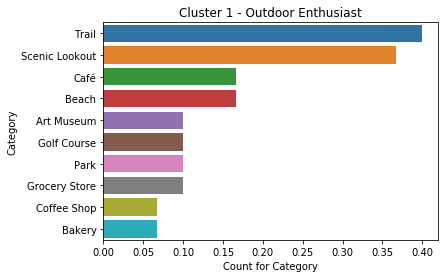

In [205]:
import seaborn as sns
#Cluster 1
plt_preparation_transposed_C1=plt_preparation_transposed[['Cluster 1']]
print(type(plt_preparation_transposed_C1))
C1_top10=plt_preparation_transposed_C1.sort_values('Cluster 1',ascending=False,).head(10).reset_index()
C1_top10.columns=['Category','Cluster 1']
C1_top10
#plt.figure(figsize=(10,6))
sns.barplot(x='Cluster 1',y='Category',data=C1_top10)
plt.title("Cluster 1 - Outdoor Enthusiast")
plt.xlabel("Count for Category")

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Count for Category')

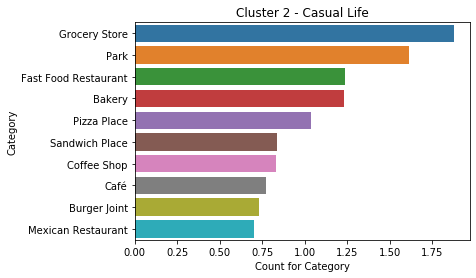

In [206]:
#Cluster 2
plt_preparation_transposed_C2=plt_preparation_transposed[['Cluster 2']]
print(type(plt_preparation_transposed_C2))
C1_top10=plt_preparation_transposed_C2.sort_values('Cluster 2',ascending=False,).head(10).reset_index()
C1_top10.columns=['Category','Cluster 2']
C1_top10
#plt.figure(figsize=(10,6))
sns.barplot(x='Cluster 2',y='Category',data=C1_top10)
plt.title("Cluster 2 - Casual Life")
plt.xlabel("Count for Category")

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Count for Category')

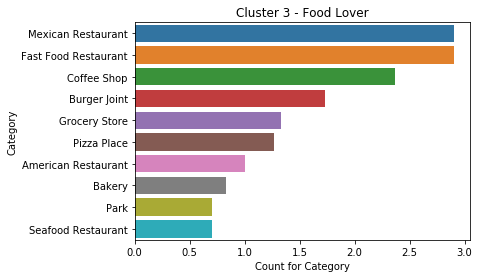

In [208]:
#Cluster 3
plt_preparation_transposed_C3=plt_preparation_transposed[['Cluster 3']]
print(type(plt_preparation_transposed_C3))
C1_top10=plt_preparation_transposed_C3.sort_values('Cluster 3',ascending=False,).head(10).reset_index()
C1_top10.columns=['Category','Cluster 3']
C1_top10
#plt.figure(figsize=(10,6))
sns.barplot(x='Cluster 3',y='Category',data=C1_top10)
plt.title("Cluster 3 - Food Lover")
plt.xlabel("Count for Category")

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Count for Category')

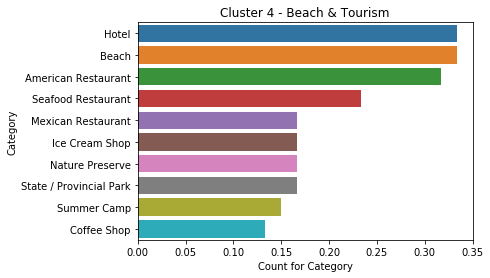

In [210]:
#Cluster 4
plt_preparation_transposed_C4=plt_preparation_transposed[['Cluster 4']]
print(type(plt_preparation_transposed_C4))
C1_top10=plt_preparation_transposed_C4.sort_values('Cluster 4',ascending=False,).head(10).reset_index()
C1_top10.columns=['Category','Cluster 4']
C1_top10
#plt.figure(figsize=(10,6))
sns.barplot(x='Cluster 4',y='Category',data=C1_top10)
plt.title("Cluster 4 - Beach & Tourism")
plt.xlabel("Count for Category")

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Count for Category')

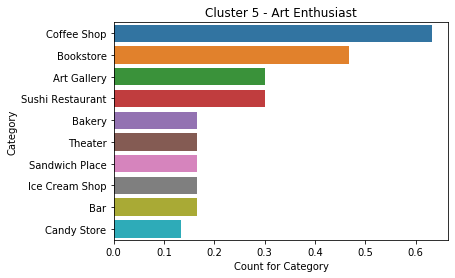

In [212]:
#Cluster 5
plt_preparation_transposed_C5=plt_preparation_transposed[['Cluster 5']]
print(type(plt_preparation_transposed_C5))
C1_top10=plt_preparation_transposed_C5.sort_values('Cluster 5',ascending=False,).head(10).reset_index()
C1_top10.columns=['Category','Cluster 5']
C1_top10
#plt.figure(figsize=(10,6))
sns.barplot(x='Cluster 5',y='Category',data=C1_top10)
plt.title("Cluster 5 - Art Enthusiast")
plt.xlabel("Count for Category")

#### Examine Cluster

In [194]:
#Cluster 1
neighborhoods_venues_sorted_final.loc[neighborhoods_venues_sorted_final['Cluster ID'] == 0, neighborhoods_venues_sorted_final.columns[[0] + list(range(1, neighborhoods_venues_sorted_final.shape[1]))]]


City  Population  Median Age  Average Household Size  \
15  Rancho Palos Verdes       41575        47.8                    2.65   
18              Topanga        9065        45.0                    2.44   
36             Altadena       45006        41.6                    2.83   

   Per capita income Median household income Median family income  Cluster ID  \
15           $58,045                $116,643             $132,492           0   
18           $66,493                $127,167             $147,188           0   
36           $40,659                 $84,413              $90,308           0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
15        Scenic Lookout           Golf Course                  Park   
18                 Trail        Scenic Lookout            Art Museum   
36                  Café        Scenic Lookout                 Trail   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
15                 Trail                 Beach         Grocery Store   
18                  Café                 Beach    Italian Restaurant   
36             Wine Shop             Multiplex                   Gym   

      7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
15       Frozen Yogurt Shop       Nature Preserve          Burger Joint   
18  State / Provincial Park           Supermarket    Seafood Restaurant   
36           Ice Cream Shop      Sushi Restaurant           Coffee Shop   

   10th Most Common Venue  
15                 Garden  
18                 Temple  
36          Grocery Store

In [195]:
#Cluster 2
neighborhoods_venues_sorted_final.loc[neighborhoods_venues_sorted_final['Cluster ID'] == 1, neighborhoods_venues_sorted_final.columns[[0] + list(range(1, neighborhoods_venues_sorted_final.shape[1]))]]

City  Population  Median Age  Average Household Size  \
4        Culver City       38899        39.1                    2.45   
5         El Segundo       16597        39.2                    2.34   
13   Manhattan Beach       34986        40.9                    2.50   
21          Torrance      144622        35.0                    2.94   
27           Artesia       16495        38.2                    3.51   
31  Hawaiian Gardens       14309        28.3                    4.03   
32            Lomita       20246        39.5                    2.48   
35       Signal Hill       10842        36.1                    2.64   
38            Duarte       21363        54.6                    2.39   
39          Monrovia       36622        37.9                    2.69   
40      Sierra Madre       10881        46.6                    2.26   
41    South Pasadena       25465        40.1                    2.43   
43        San Marino       13131        45.4                    3.01   
45      Agoura Hills       20353        42.7                    2.76   
46         Calabasas       22839        42.4                    2.76   
49   Stevenson Ranch       17116        36.0                    3.04   
50           Burbank      103037        38.3                    2.53   
53         Claremont       34824        38.6                    2.58   
59  Hacienda Heights       55684        40.1                    3.33   
60   Rowland Heights       50663        39.8                    3.40   
61          La Verne       31139        42.6                    2.71   
63       Diamond Bar       55668        40.8                    3.08   
65          Rosemead       53725        38.3                    3.70   
66         San Dimas       33523        42.5                    2.73   
67       San Gabriel       39703        41.4                    2.90   
68       Temple City       35372        41.1                    3.03   
70          Alhambra       83301        39.1                    2.71   
71             Acton        7138        45.2                    2.86   

   Per capita income Median household income Median family income  Cluster ID  \
4            $42,832                 $75,596              $96,809           1   
5            $46,185                 $88,486             $103,890           1   
13           $81,472                $132,752             $178,783           1   
21           $36,370                 $75,885              $91,028           1   
27           $21,366                 $58,281              $60,260           1   
31           $14,066                 $42,898              $44,821           1   
32           $29,251                 $61,327              $72,933           1   
35           $34,215                 $69,946              $72,891           1   
38           $25,717                 $64,329              $70,068           1   
39           $32,084                 $68,071              $77,073           1   
40           $52,221                 $84,487             $115,329           1   
41           $50,185                 $84,914             $103,970           1   
43           $78,155                $154,318             $164,643           1   
45           $53,193                $108,820             $129,648           1   
46           $67,123                $118,182             $135,889           1   
49           $47,877                $114,036             $130,036           1   
50           $33,651                 $66,024              $78,802           1   
53           $37,539                 $81,715             $104,608           1   
59           $28,376                 $72,759              $79,390           1   
60           $26,030                 $63,750              $66,383           1   
61           $32,335                 $77,088              $89,824           1   
63           $35,771                 $90,153              $98,506           1   
65           $17,869                 $47,964              $51,70

In [196]:
#Cluster 3
neighborhoods_venues_sorted_final.loc[neighborhoods_venues_sorted_final['Cluster ID'] == 2, neighborhoods_venues_sorted_final.columns[[0] + list(range(1, neighborhoods_venues_sorted_final.shape[1]))]]

City  Population  Median Age  Average Household Size  \
2       Bell Gardens       42294        27.8                    4.16   
3            Compton       96102        29.8                    3.85   
6            Gardena       58743        35.5                    2.96   
7          Hawthorne       84293        31.9                    2.98   
9    Huntington Park       58465        29.1                    4.06   
10          Lawndale       32652        32.7                    3.33   
11           Lynwood       69818        27.8                    4.57   
14           Maywood       27454        27.9                    4.16   
17        South Gate       94586        29.4                    4.05   
19         Inglewood      109967        32.6                    3.01   
20      Santa Monica       89153        37.8                    1.49   
22          Whittier       85161        36.6                    2.89   
23        Montebello       62470        34.7                    3.27   
24           Norwalk      105348        32.5                    3.83   
25       Pico Rivera       63004        34.0                    3.77   
26  Santa Fe Springs       16333        36.2                    3.34   
28          Cerritos       49281        43.9                    3.16   
30        Bellflower       76243        31.9                    3.21   
33         Paramount       54196        28.6                    3.87   
34            Carson       91508        37.1                    3.73   
47      San Fernando       23638        30.1                    4.17   
48     Santa Clarita      173993        36.4                    3.01   
51             Azusa       46177        29.4                    3.67   
52      Baldwin Park       75441        30.5                    4.35   
54            Covina       47662        34.0                    3.41   
56    South El Monte       20197        30.5                    4.40   
57          Glendora       50000        38.5                    2.94   
58         La Puente       39957        30.9                    4.55   
62     Monterey Park       60251        42.9                    2.92   
64            Pomona      148946        28.7                    4.01   
69       West Covina      105810        35.2                    3.49   
73         Lancaster      152678        31.1                    2.74   
74        Littlerock        1237        32.9                    3.66   
75          Palmdale      149001        27.5                    3.58   

   Per capita income Median household income Median family income  Cluster ID  \
2            $12,026                 $38,971              $39,190           2   
3            $13,595                 $43,311              $44,835           2   
6            $22,969                 $46,961              $55,227           2   
7            $19,862                 $45,622              $50,490           2   
9            $12,461                 $36,788              $37,573           2   
10           $18,895                 $48,813              $52,093           2   
11           $12,443                 $43,782              $43,856           2   
14           $12,210                 $38,155              $39,204           2   
17           $14,039                 $41,990              $44,007           2   
19           $20,187                 $44,021              $47,697           2   
20           $58,933                 $71,400             $107,660           2   
22           $28,031                 $68,055              $73,744           2   
23           $21,253                 $52,496              $57,094           2   
24           $19,379                 $60,090              $62,761           2   
25           $18,428                 $55,632              $61,607           2   
26           $18,675                 $53,638              $61,823           2   
28           $32,610                 $87,853              $95,282           2   
30           $20,591                 

In [197]:
#Cluster 4
neighborhoods_venues_sorted_final.loc[neighborhoods_venues_sorted_final['Cluster ID'] == 3, neighborhoods_venues_sorted_final.columns[[0] + list(range(1, neighborhoods_venues_sorted_final.shape[1]))]]

City  Population  Median Age  Average Household Size  \
8   Hermosa Beach       19422        37.0                    2.04   
12         Malibu       12746        19.7                    0.00   
16  Redondo Beach       66397        42.0                    2.07   
29         Avalon        3690        37.2                    2.50   
72    Lake Hughes         680        41.7                    2.45   

   Per capita income Median household income Median family income  Cluster ID  \
8            $69,857                $102,289             $156,506           3   
12           $99,692                $132,926             $155,082           3   
16           $51,703                 $94,982             $118,658           3   
29           $24,296                 $49,514              $64,087           3   
72           $24,742                 $52,823              $64,318           3   

      1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
8                     Hotel                 Beach           Coffee Shop   
12                    Beach    Seafood Restaurant        Ice Cream Shop   
16                    Beach                 Hotel    Mexican Restaurant   
29                    Hotel    Seafood Restaurant    Mexican Restaurant   
72  State / Provincial Park       Nature Preserve                   Bar   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
8         Breakfast Spot           Summer Camp            Steakhouse   
12             Surf Spot           Coffee Shop                Lounge   
16                 Diner    Seafood Restaurant             Rock Club   
29        Ice Cream Shop              Dive Bar            Steakhouse   
72                Museum            Campground                  Food   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
8     Spanish Restaurant    Mexican Restaurant        Ice Cream Shop   
12        History Museum          Optical Shop      Cuban Restaurant   
16                  Park        Sandwich Place               Brewery   
29           Candy Store                   Spa          Cocktail Bar   
72           Golf Course                  Lake           Summer Camp   

   10th Most Common Venue  
8               Juice Bar  
12         Sandwich Place  
16            Coffee Shop  
29            Coffee Shop  
72                   Farm

In [198]:
#Cluster 5
neighborhoods_venues_sorted_final.loc[neighborhoods_venues_sorted_final['Cluster ID'] == 4, neighborhoods_venues_sorted_final.columns[[0] + list(range(1, neighborhoods_venues_sorted_final.shape[1]))]]

City  Population  Median Age  Average Household Size  \
0      Los Angeles     3782544        26.6                    4.40   
1   West Hollywood       34564        41.5                    1.53   
37         Arcadia       55993        42.7                    2.98   
42        Pasadena      136807        33.7                    1.86   
44        Glendale      192069        40.4                    2.78   
55        El Monte      113763        32.9                    3.66   

   Per capita income Median household income Median family income  Cluster ID  \
0            $28,222                 $50,028              $54,243           4   
1            $53,227                 $52,303              $63,725           4   
37           $38,518                 $77,221              $93,977           4   
42           $39,825                 $67,920              $81,498           4   
44           $30,107                 $54,087              $61,283           4   
55           $14,464                 $41,820              $43,183           4   

   1st Most Common Venue 2nd Most Common Venue    3rd Most Common Venue  \
0              Bookstore           Art Gallery              Coffee Shop   
1            Coffee Shop                  Café  New American Restaurant   
37             Bookstore           Art Gallery              Coffee Shop   
42           Coffee Shop             Multiplex    Indonesian Restaurant   
44             Bookstore           Art Gallery              Coffee Shop   
55             Bookstore           Art Gallery              Coffee Shop   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0       Sushi Restaurant        Ice Cream Shop           Music Venue   
1         Ice Cream Shop         Grocery Store              Boutique   
37      Sushi Restaurant        Ice Cream Shop           Music Venue   
42           Pizza Place           Salad Place      Sushi Restaurant   
44      Sushi Restaurant        Ice Cream Shop           Music Venue   
55      Sushi Restaurant        Ice Cream Shop           Music Venue   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0               Building     German Restaurant        Sandwich Place   
1          Tattoo Parlor             Bookstore         Shopping Mall   
37              Building     German Restaurant        Sandwich Place   
42            Taco Place         Grocery Store             Bookstore   
44              Building     German Restaurant        Sandwich Place   
55              Building     German Restaurant        Sandwich Place   

   10th Most Common Venue  
0                  Market  
1          Sandwich Place  
37                 Market  
42                    Gym  
44                 Market  
55                 Market

### Visualization

In [199]:
address = 'Los Angeles, CA, USA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
la_latitude = location.latitude
la_longitude = location.longitude
print('The geograpical coordinate of los angeles are {}, {}.'.format(la_latitude, la_longitude))

The geograpical coordinate of los angeles are 34.0536909, -118.242766.


In [200]:
lacounty_geo = r'Los Angeles Neighborhood Map.geojson' # geojson file

In [201]:
map_cluster_population=folium.Map(location=[la_latitude, la_longitude],width=750, height=500, zoom_start=10)

bins=list(LA_final['Population'].quantile([0,0.50,0.75,0.95,1]))
bins
map_cluster_population.choropleth(
    geo_data=lacounty_geo,
    data=LA_final,
    columns=['City', 'Population'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population by City',
    threshold_scale=bins,
    reset=True
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to map
for lat, lng, neighborhood,cluster in zip(LA_final['lat'], LA_final['log'], LA_final['City'],LA_final["Cluster ID"]):
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(str(neighborhood)+' Cluster '+str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#31cccc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cluster_population)  
    
map_cluster_population

In [202]:
lacounty_geo = r'Los Angeles Neighborhood Map.geojson' # geojson file
map_cluster_age=folium.Map(location=[la_latitude, la_longitude],width=750, height=500, zoom_start=10)

#bins=list(LA_final['Median family income'].quantile([0,0.50,0.75,0.95,1]))
#bins
map_cluster_age.choropleth(
    geo_data=lacounty_geo,
    data=LA_final,
    columns=['City', 'Median Age'],
    key_on='feature.properties.name',
    fill_color='Greens', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Age by City',
    reset=True
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to map
for lat, lng, neighborhood,cluster in zip(LA_final['lat'], LA_final['log'], LA_final['City'],LA_final["Cluster ID"]):
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(str(neighborhood)+' Cluster '+str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#31cccc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cluster_age)  
    
map_cluster_age

In [203]:
map_cluster_income=folium.Map(location=[la_latitude, la_longitude],width=750, height=500, zoom_start=10)

#bins=list(LA_final['Median family income'].quantile([0,0.50,0.75,0.95,1]))
#bins
map_cluster_income.choropleth(
    geo_data=lacounty_geo,
    data=LA_final,
    columns=['City', 'Median family income'],
    key_on='feature.properties.name',
    fill_color='Blues', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Median family income by City',
    reset=True
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to map
for lat, lng, neighborhood,cluster in zip(LA_final['lat'], LA_final['log'], LA_final['City'],LA_final["Cluster ID"]):
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(str(neighborhood)+' Cluster '+str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#31cccc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cluster_income)  
    
map_cluster_income

In [204]:
map_cluster_householdsize=folium.Map(location=[la_latitude, la_longitude],width=750, height=500, zoom_start=10)

#bins=list(LA_final['Population'].quantile([0,0.50,0.75,0.95,1]))
#bins
map_cluster_householdsize.choropleth(
    geo_data=lacounty_geo,
    data=LA_final,
    columns=['City', 'Average Household Size'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Household Size',
    reset=True
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to map
for lat, lng, neighborhood,cluster in zip(LA_final['lat'], LA_final['log'], LA_final['City'],LA_final["Cluster ID"]):
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(str(neighborhood)+' Cluster '+str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#31cccc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cluster_householdsize)  
    
map_cluster_householdsize